In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython
from scipy import signal
import librosa.display
import librosa
import sklearn
from sklearn import ensemble, model_selection, svm, pipeline, preprocessing
from pathlib import Path
from sklearn.decomposition import PCA


## Load labels

In [2]:
datapath = Path('data_npy/gtzan')
# datapath = Path('data_npy/fma_small')
# datapath = Path('data_npy/fma_small_22k')

labels = np.load(datapath / 'labels_train.npy')
np.unique(labels)

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype='<U9')

## Load features

In [13]:
features = [
    np.load(datapath / 'mfcc.npy'),
    np.load(datapath / 'sc.npy'),
    #  np.load(datapath / 'mel.npy'),
    np.load(datapath / 'stft.npy'),
    # np.load(datapath / 'tempo.npy'),
    # np.load(datapath / 'zero.npy'),
]

# features = [
#     np.load(datapath / 'jukebox_embedding_small.npy')
# ]

features = np.concatenate(features, axis=1)

features.shape

(799, 695955)

In [16]:
features = features.astype(np.float32)
features.dtype

dtype('float32')

## Cross-validation

In [17]:
# clf = ensemble.RandomForestClassifier()
clf = svm.SVC()

In [18]:
pipe = pipeline.Pipeline(
    [
        ('scaler', preprocessing.StandardScaler()),
        ('dim_reduction', PCA(n_components=100)),
        ('clf', clf),
    ]
)

In [19]:
cv = model_selection.StratifiedKFold(n_splits=10)

In [20]:
y_pred = model_selection.cross_val_predict(
    estimator=pipe, 
    X=features, 
    y=labels, 
    cv=cv, 
    n_jobs=-1
)

In [21]:
sklearn.metrics.accuracy_score(labels, y_pred)

0.5193992490613266

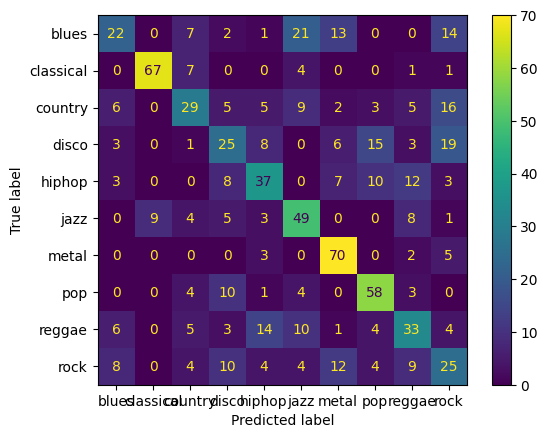

In [22]:
sklearn.metrics.ConfusionMatrixDisplay.from_predictions(labels, y_pred)